<a href="https://colab.research.google.com/github/aipelsi/Obesity-Prediction/blob/main/Multinomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-51-c118ad89a894>:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


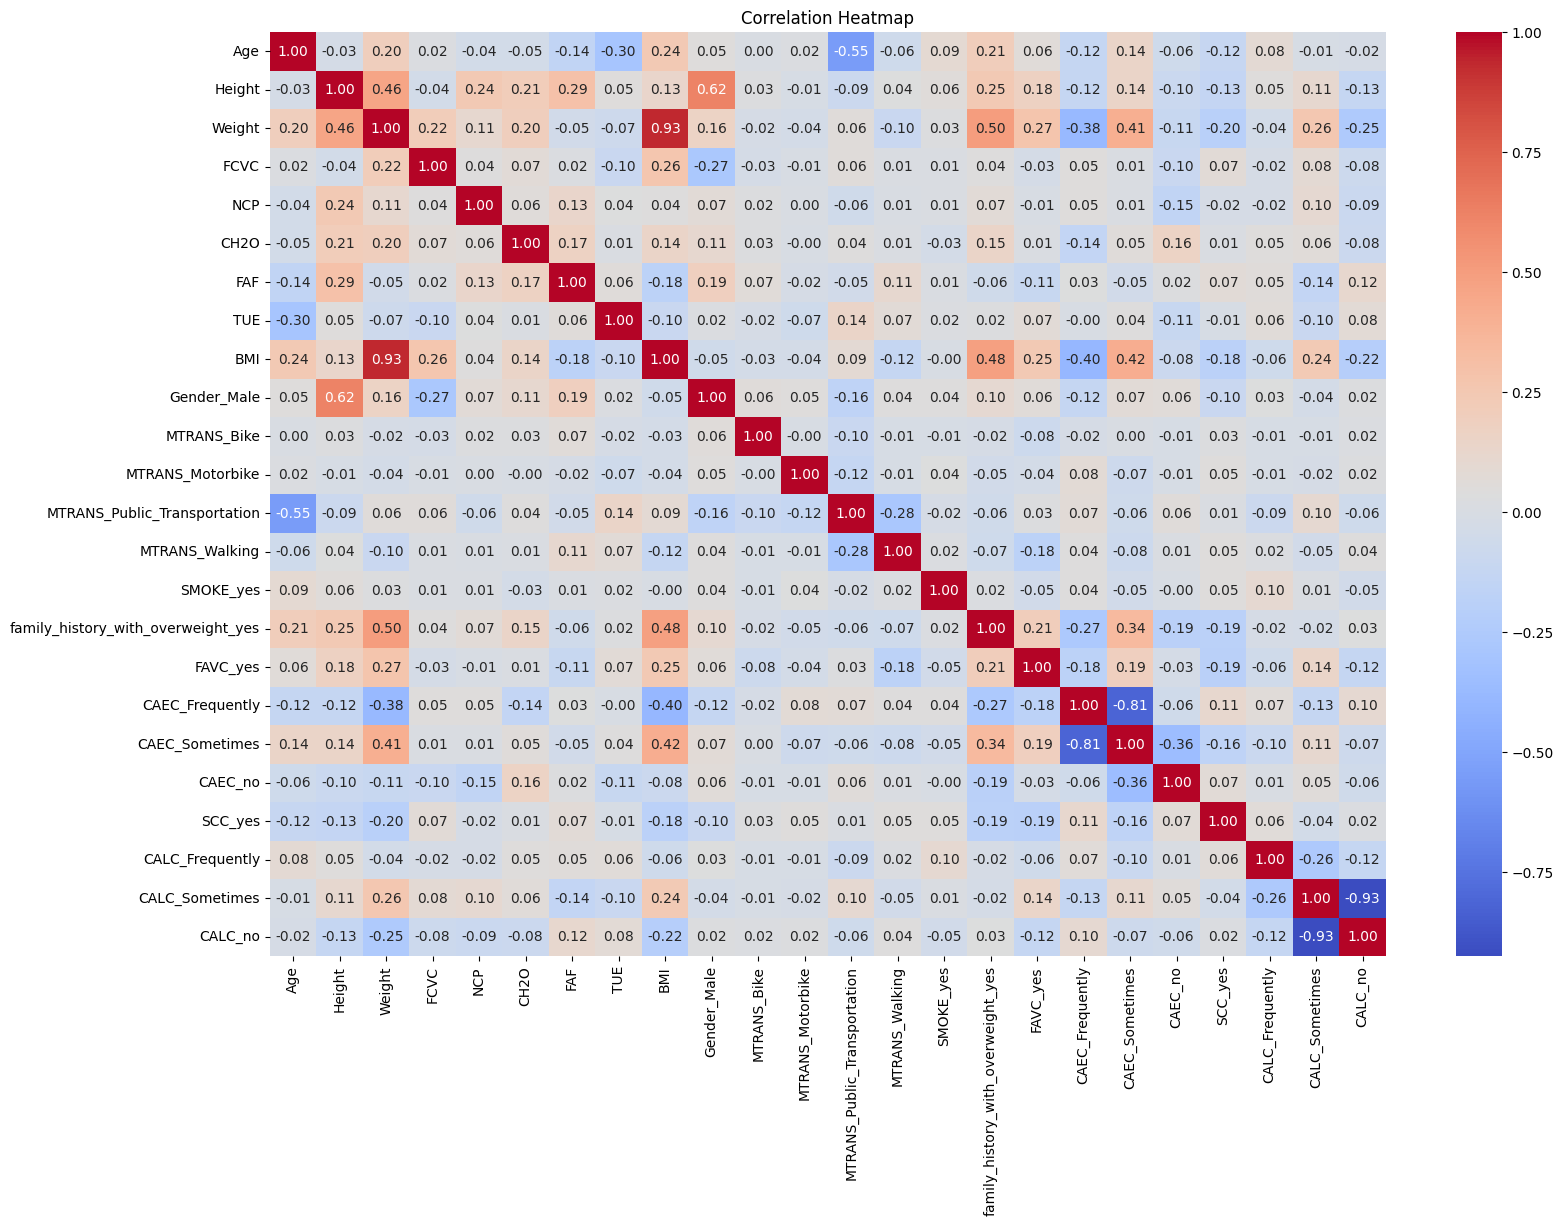

Logistic Regression Model:
Accuracy: 0.6312056737588653
Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.63      0.63        67
   Obesity I       0.60      0.46      0.52        83
  Obesity II       0.62      0.82      0.71        60
 Obesity III       0.91      1.00      0.95        58
  Overweight       0.47      0.51      0.49       101
 Underweight       0.72      0.52      0.60        54

    accuracy                           0.63       423
   macro avg       0.66      0.66      0.65       423
weighted avg       0.63      0.63      0.63       423



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# Load the data
data = pd.read_csv('Obesity.csv')

# Assuming 'Weight' is in kilograms and 'Height' is in meters
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Assign BMI classifications based on WHO and Mexican Normativity standards
def assign_bmi_class(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi_value < 25.0:
        return 'Normal'
    elif 25.0 <= bmi_value < 30.0:
        return 'Overweight'
    elif 30.0 <= bmi_value < 35.0:
        return 'Obesity I'
    elif 35.0 <= bmi_value < 40.0:
        return 'Obesity II'
    else:
        return 'Obesity III'

data['Actual_BMI_Class'] = data['BMI'].apply(assign_bmi_class)

# Convert categorical variables to numerical representations
data = pd.get_dummies(data, columns=['Gender', 'MTRANS','SMOKE','family_history_with_overweight','FAVC','CAEC','SCC','CALC'], drop_first=True)

import matplotlib.pyplot as plt
# Explore relationships between numerical variables and the target
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Label encode the target variable 'Actual_BMI_Class'
le = LabelEncoder()
data['Actual_BMI_Class'] = le.fit_transform(data['Actual_BMI_Class'])

# Split the data into features (X) and target variable (y)
X = data.drop(['Actual_BMI_Class', 'Weight', 'Height', 'BMI', 'NObeyesdad'], axis=1)
y=data['Actual_BMI_Class']




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with preprocessing and model
logistic_regression_model = Pipeline(steps=[
    ('scaler', StandardScaler()),        # Numerical feature scaling
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')),  # One-hot encoding with handling unknown categories
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

# Train the logistic regression model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_result_lr = classification_report(y_test, y_pred_lr)

## Return the encoded class labels back to their original values
class_labels = le.classes_

# Decode the predicted and true labels
y_pred_labels = le.inverse_transform(y_pred_lr)
y_test_labels = le.inverse_transform(y_test)

# Print the classification report with original BMI class labels
classification_report_result_lr = classification_report(y_test_labels, y_pred_labels, target_names=class_labels)
print('Logistic Regression Model:')
print(f'Accuracy: {accuracy_lr}')
print('Classification Report:\n', classification_report_result_lr)









In [ ]:
#baseline Accuracy
from sklearn.dummy import DummyClassifier

# Create a dummy classifier that always predicts the most frequent class
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Fit the dummy classifier on the training data
dummy_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_baseline = dummy_classifier.predict(X_test)

# Calculate accuracy for the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f'Baseline Accuracy: {accuracy_baseline}')


Baseline Accuracy: 0.23877068557919623


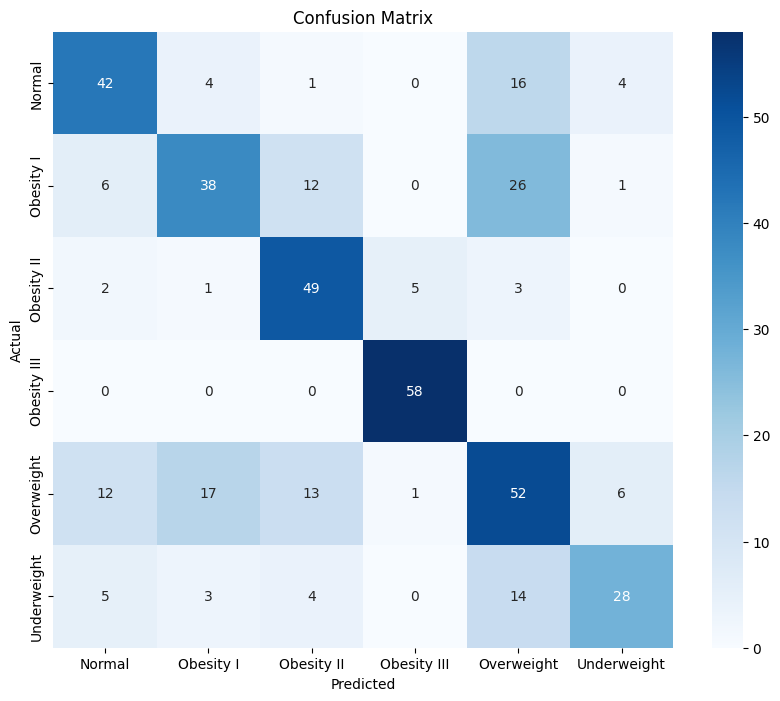

In [ ]:
#Checking Performance
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Running Lineas Regression to see the correlation values **

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


Obesity= pd.read_csv('Obesity.csv')
Obesity['BMI'] = Obesity['Weight'] / (Obesity['Height'] ** 2)
Obesity.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

In [ ]:
Obesity_regression_model_Train = smf.ols("BMI ~Gender+ Age+ family_history_with_overweight+ FAVC + FCVC+ NCP+ CAEC+ SMOKE+ CH2O + SCC+ FAF+TUE + CALC + MTRANS", data = Obesity)
Obesity_regression_result_Train=Obesity_regression_model_Train.fit()
print(Obesity_regression_result_Train.summary() )

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     99.43
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          3.00e-295
Time:                        03:09:24   Log-Likelihood:                -6656.2
No. Observations:                2111   AIC:                         1.336e+04
Df Residuals:                    2089   BIC:                         1.348e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Logistic Regression Model:
Accuracy: 0.5791962174940898
Classification Report:
               precision    recall  f1-score   support

      Normal       0.49      0.27      0.35        67
   Obesity I       0.63      0.40      0.49        83
  Obesity II       0.62      0.70      0.66        60
 Obesity III       0.91      0.91      0.91        58
  Overweight       0.46      0.62      0.53       101
 Underweight       0.51      0.67      0.58        54

    accuracy                           0.58       423
   macro avg       0.60      0.60      0.59       423
weighted avg       0.59      0.58      0.57       423



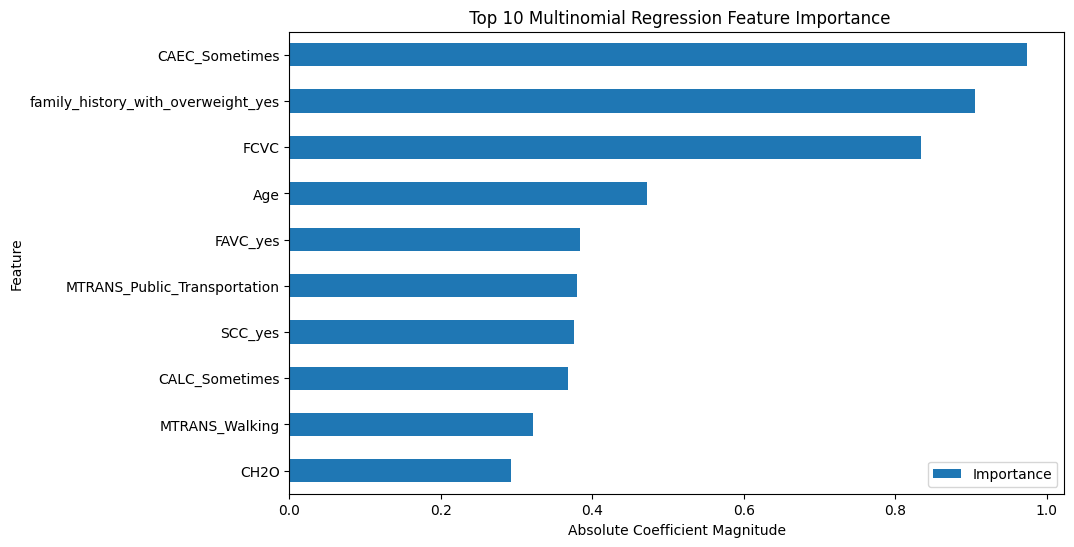

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('Obesity.csv')

# Assuming 'Weight' is in kilograms and 'Height' is in meters
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Assign BMI classifications based on WHO and Mexican Normativity standards
def assign_bmi_class(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi_value < 25.0:
        return 'Normal'
    elif 25.0 <= bmi_value < 30.0:
        return 'Overweight'
    elif 30.0 <= bmi_value < 35.0:
        return 'Obesity I'
    elif 35.0 <= bmi_value < 40.0:
        return 'Obesity II'
    else:
        return 'Obesity III'

data['Actual_BMI_Class'] = data['BMI'].apply(assign_bmi_class)

# Convert categorical variables to numerical representations
data = pd.get_dummies(data, columns=['Gender', 'MTRANS','SMOKE','family_history_with_overweight','FAVC','CAEC','SCC','CALC'], drop_first=True)

# Extract relevant columns (including numerical and non-categorical columns)
X = data.drop(['Actual_BMI_Class', 'Weight', 'Height', 'BMI', 'NObeyesdad'], axis=1)
y = data['Actual_BMI_Class']

# Label encode categorical columns
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build a pipeline with preprocessing and model
logistic_regression_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Numerical feature scaling
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

# Train the logistic regression model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_result_lr = classification_report(y_test, y_pred_lr)

# Print the classification report
print('Logistic Regression Model:')
print(f'Accuracy: {accuracy_lr}')
print('Classification Report:\n', classification_report_result_lr)

# Important Features
coefficients = logistic_regression_model.named_steps['classifier'].coef_

# Check lengths of arrays
if len(X.columns) != len(coefficients[0]):
    print("Length of X.columns:", len(X.columns))
    print("Length of coefficients:", len(coefficients[0]))
    raise ValueError("Length mismatch: X.columns and coefficients must have the same length")

avg_importance = abs(coefficients[0])
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.nlargest(10, 'Importance')
# Sort the feature_importance DataFrame in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Print or plot the feature importance
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title(' Top 10 Multinomial Regression Feature Importance')
plt.xlabel('Absolute Coefficient Magnitude')
plt.show()


